<a href="https://colab.research.google.com/github/catavasia/ML_FIAN-21/blob/main/seminar09_hw_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [ ]:
data_train = tfds.load(name="fashion_mnist", split="train").prefetch(10000).cache()
data_test  = tfds.load(name="fashion_mnist", split="test" ).prefetch(10000).cache()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteB47RNR/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteB47RNR/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(data_train)
print(data_test)

<CacheDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<CacheDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [ ]:
for element in data_train:
  print(element["image"].shape, element["label"])
  print(element.keys)
  break

(28, 28, 1) tf.Tensor(2, shape=(), dtype=int64)
<built-in method keys of dict object at 0x7f167c33fe60>


In [ ]:
def unwrap(x):
  
  return (x['image'], x['label'])

batch_size = 1024

In [ ]:
########################################################
# Extract the data from the dataset into a numpy array
X_batches = []
y_batches = []
for batch in data_test.batch(4096):
  X_batches.append(batch['image'].numpy().astype('float32'))
  y_batches.append(batch['label'].numpy())

X_test = np.concatenate(X_batches)
y_test = np.concatenate(y_batches)

In [ ]:
X_batches = []
y_batches = []
for batch in data_train.batch(4096):
  X_batches.append(batch['image'].numpy().astype('float32'))
  y_batches.append(batch['label'].numpy())

X_train = np.concatenate(X_batches)
y_train = np.concatenate(y_batches)

# Ex 1 - Preprocessing using the `map` method



In [ ]:
num_hidden = 64

In [ ]:
preproc  = lambda x: tf.reshape(x / 255., (-1, 28*28))
def unwrap_2(x):
  return (preproc(x['image']), x['label'])

In [ ]:
model = tf.keras.Sequential([

  tf.keras.layers.Dense(num_hidden, name='layer_1'),
  tf.keras.layers.Dense(60, activation='relu', name='layer_2'),
  tf.keras.layers.Dense(10)
])


model.compile(optimizer='rmsprop',
          loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics='accuracy')


In [ ]:
model.fit(x=data_train.map(unwrap_2).shuffle(60000).batch(batch_size),
          epochs=10,
          validation_data=data_test.map(unwrap).batch(4096))

TypeError: ignored

AttributeError: ignored

In [ ]:
data_train.map(unwrap).shuffle(60000).batch(batch_size).map(lambda x: tf.reshape(x / 255., (-1, 28*28)))

TypeError: ignored

<CacheDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

# Ex 2 - More layers

In [ ]:
num_hidden = 64

In [ ]:
model = tf.keras.Sequential([
# First layer will do the preprocessing and reshaping of the data (typically
# you want to do this step beforehand, outside of the model, in order to
# improve the performance)
  tf.keras.layers.Lambda(
    lambda x: tf.reshape(x / 255., (-1, 28*28)),
    input_shape=(28, 28, 1), name='preprocessing'
  ),

# Densely connected hidden layer
  tf.keras.layers.Dense(num_hidden, name='layer_1'),


  tf.keras.layers.Dense(60, activation='relu', name='layer_2'),
  tf.keras.layers.Dense(50, activation='softmax', name='layer_3'),
  tf.keras.layers.Dense(60, activation='relu', name='layer_4'),


tf.keras.layers.Dense(10)
])


model.compile(optimizer='rmsprop',
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics='accuracy')

In [ ]:
# This one will save only the best model based on the validation metric (accuracy):
saver = tf.keras.callbacks.ModelCheckpoint(filepath='model_best.h5',
                                            monitor='val_accuracy',
                                            save_best_only=True)

# We need to provide these callbacks to the `callbacks` argument of the `fit` method:
history = model.fit(x=data_train.map(unwrap).shuffle(60000).batch(batch_size),
          epochs=30,
          validation_data=data_test.map(unwrap).batch(4096),
          callbacks=[saver])

Epoch 1/30
59/59 [==============================] - 2s 20ms/step - loss: 2.0091 - accuracy: 0.4670 - val_loss: 1.7348 - val_accuracy: 0.6046
Epoch 2/30
59/59 [==============================] - 1s 18ms/step - loss: 1.4780 - accuracy: 0.6263 - val_loss: 1.2363 - val_accuracy: 0.6301
Epoch 3/30
59/59 [==============================] - 1s 17ms/step - loss: 1.0447 - accuracy: 0.6523 - val_loss: 0.9201 - val_accuracy: 0.6495
Epoch 4/30
59/59 [==============================] - 1s 17ms/step - loss: 0.8208 - accuracy: 0.6604 - val_loss: 0.7813 - val_accuracy: 0.6559
Epoch 5/30
59/59 [==============================] - 1s 17ms/step - loss: 0.7436 - accuracy: 0.6677 - val_loss: 0.7423 - val_accuracy: 0.6565
Epoch 6/30
59/59 [==============================] - 1s 17ms/step - loss: 0.7090 - accuracy: 0.6848 - val_loss: 0.7400 - val_accuracy: 0.7001
Epoch 7/30
59/59 [==============================] - 1s 18ms/step - loss: 0.6698 - accuracy: 0.7297 - val_loss: 0.7147 - val_accuracy: 0.7280
Epoch 8/30
59

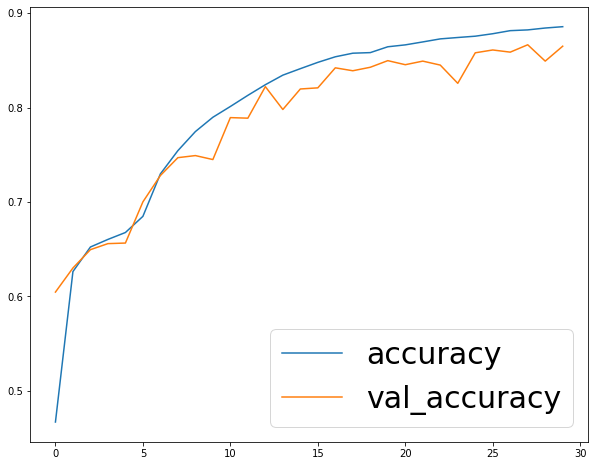

In [ ]:
plt.figure(figsize=(10,8))
plt.plot( history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(fontsize=30)

In [ ]:
loaded_model = tf.keras.models.load_model('model_best.h5')
predictions = model(X_test).numpy().argmax(axis=1)
print("Test accuracy is:", (predictions == y_test).mean())

Test accuracy is: 0.8649
